In [1]:
conda install quandl 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/hakangurler/opt/anaconda3

  added / updated specs:
    - quandl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    inflection-0.5.1           |   py38hecd8cb5_0          12 KB
    quandl-3.6.1               |   py38hecd8cb5_0          53 KB
    ------------------------------------------------------------
                                           Total:          65 KB

The following NEW packages will be INSTALLED:

  inflection         pkgs/main/osx-64::inflection-0.5.1-py38hecd8cb5_0
  quandl             pkgs/main/osx-64::quandl-3.6.1-py38hecd8cb5_0



inflection-0.5.1     | 12 KB     | ##################################### | 100%

In [3]:
conda update -n base -c defaults conda

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/hakangurler/opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-content-trust-0.1.3  |   py38hecd8cb5_0          70 KB
    conda-package-handling-2.0.2|   py38hecd8cb5_0         268 KB
    conda-package-streaming-0.7.0|   py38hecd8cb5_0          27 KB
    conda-token-0.4.0          |     pyhd3eb1b0_0          13 KB
    xmltodict-0.12.0           |     pyhd3eb1b0_0          13 KB
    zstandard-0.19.0           |   py38h6c40b1e_0         497 KB
    ------------------------------------------------------------
                                           Total:         888 KB

The f

In [ ]:
JJdW9oomy2D3EZgze_C9 

In [39]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [40]:
# Configure API key 

quandl.ApiConfig.api_key = 'JJdW9oomy2D3EZgze_C9'

In [41]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('BP/GEO_CAP_EUR')

In [42]:
data.head(5)

,Value
Date,
1990-12-31,617.6
1995-12-31,710.9
2000-12-31,794.0
2001-12-31,807.0
2002-12-31,902.0


In [43]:
data.tail(5)

,Value
Date,
2016-12-31,2327.484
2017-12-31,2621.855
2018-12-31,2899.655
2019-12-31,3136.665
2020-12-31,3265.000


In [44]:
data.shape

(23, 1)

In [45]:
data.columns

Index(['Value'], dtype='object')

In [46]:
type(data)

pandas.core.frame.DataFrame

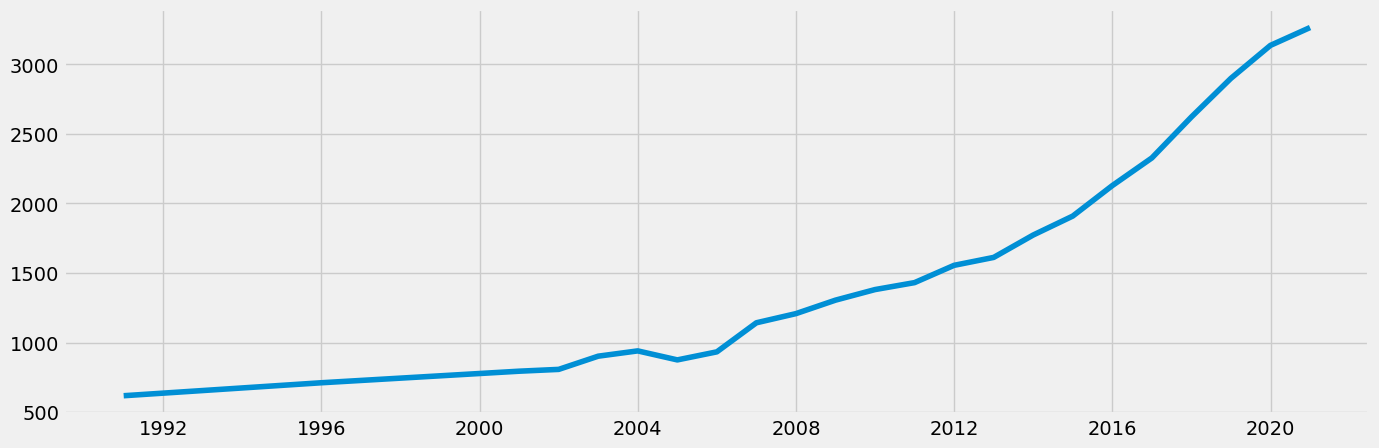

In [47]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [48]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [49]:
data_2.head()

,Date,Value
0,1990-12-31,617.6
1,1995-12-31,710.9
2,2000-12-31,794.0
3,2001-12-31,807.0
4,2002-12-31,902.0


In [50]:
data_sub = data_2.loc[(data_2['Date'] >= '1989-12-31')]

In [51]:
data_sub.head()

,Date,Value
0,1990-12-31,617.6
1,1995-12-31,710.9
2,2000-12-31,794.0
3,2001-12-31,807.0
4,2002-12-31,902.0


In [52]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1990-12-31,617.6
1995-12-31,710.9
2000-12-31,794.0
2001-12-31,807.0
2002-12-31,902.0


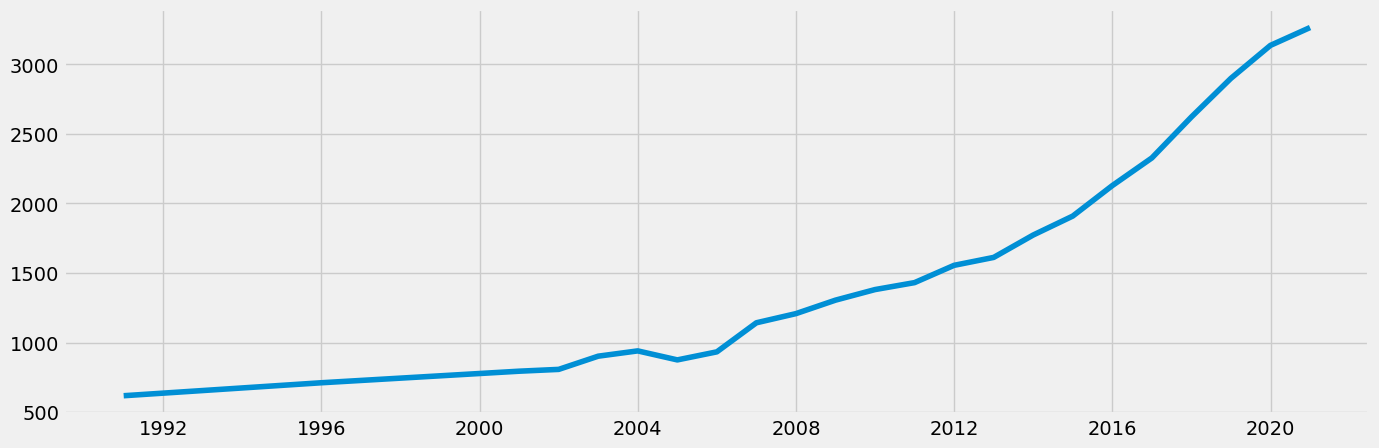

In [53]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [54]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [55]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

In [56]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=1)

In [57]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

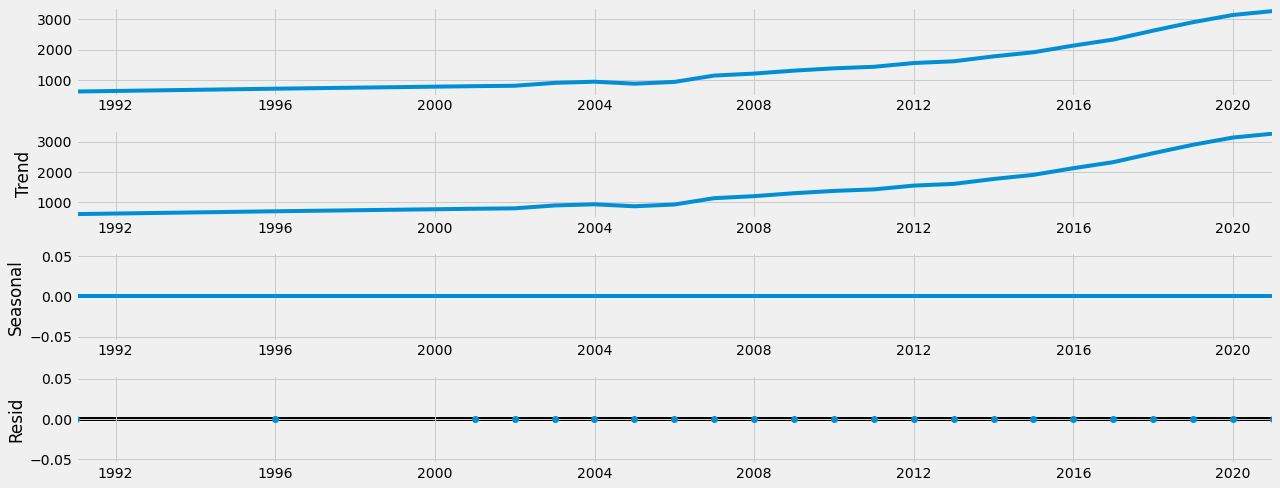

In [58]:
decomposition.plot()
plt.show()

In [70]:
# Decompose the time series using an multiplicative model

decomposition_multi = sm.tsa.seasonal_decompose(data_sub, model='multiplicative', period=1) 

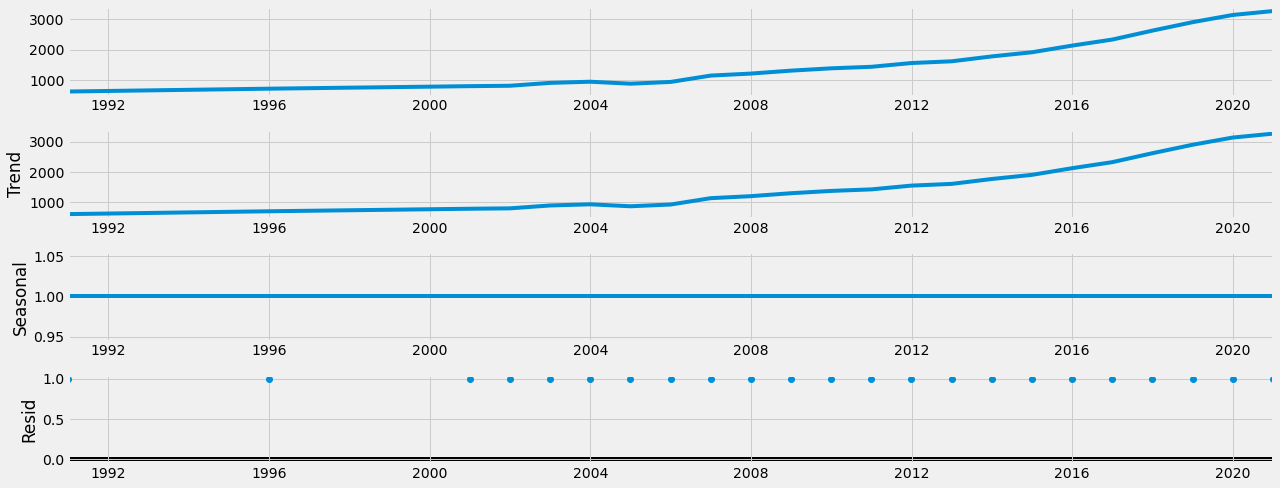

In [71]:
# Plot the separate components

decomposition_multi.plot()
plt.show()

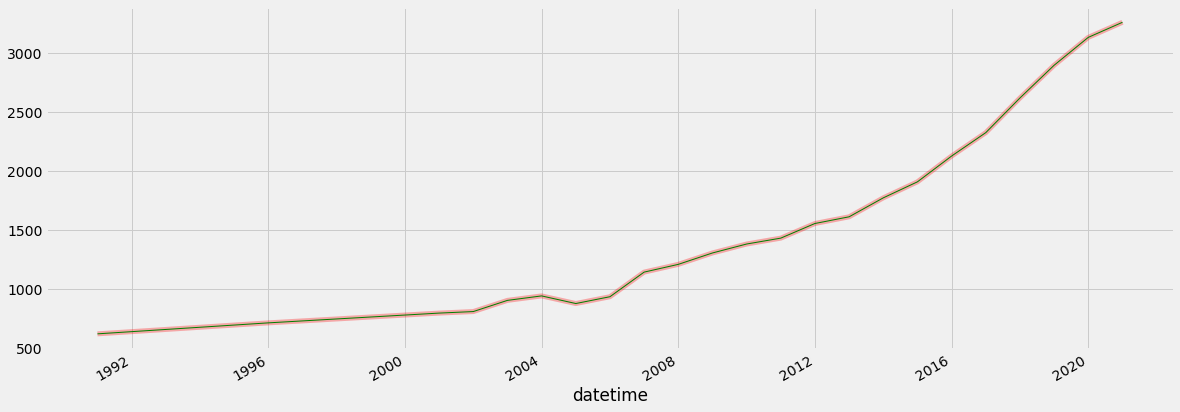

In [73]:
# Evaluating trends component from both models

decomposition.trend.plot(color='red', linewidth=5, alpha=0.3)
decomposition_multi.trend.plot(color='green', linewidth=1)
plt.show()

In [59]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  4.047572
p-value                         1.000000
Number of Lags Used             0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


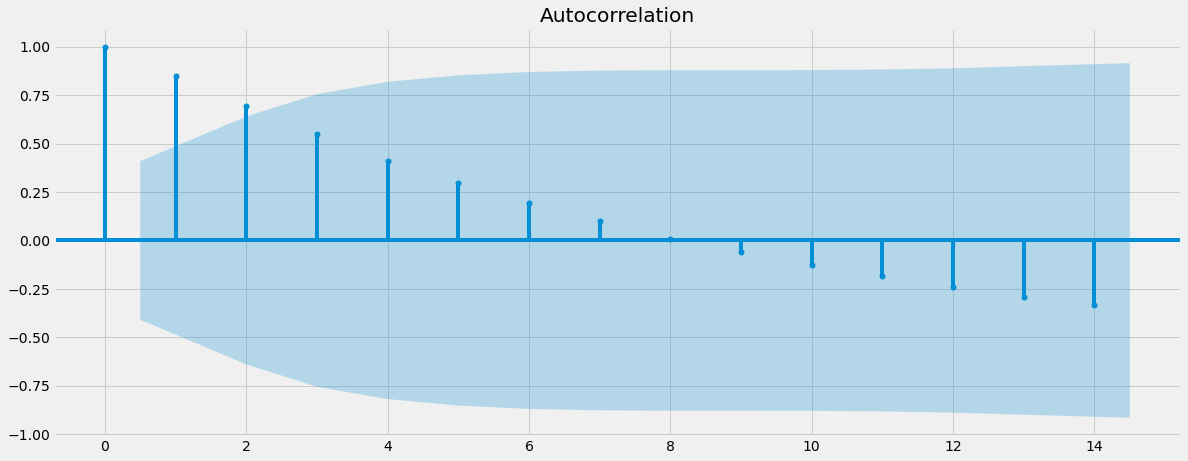

In [60]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [61]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [62]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [63]:
data_diff.head()

,Value
datetime,
1995-12-31,93.3
2000-12-31,83.1
2001-12-31,13.0
2002-12-31,95.0
2003-12-31,38.0


In [64]:
data_diff.columns

Index(['Value'], dtype='object')

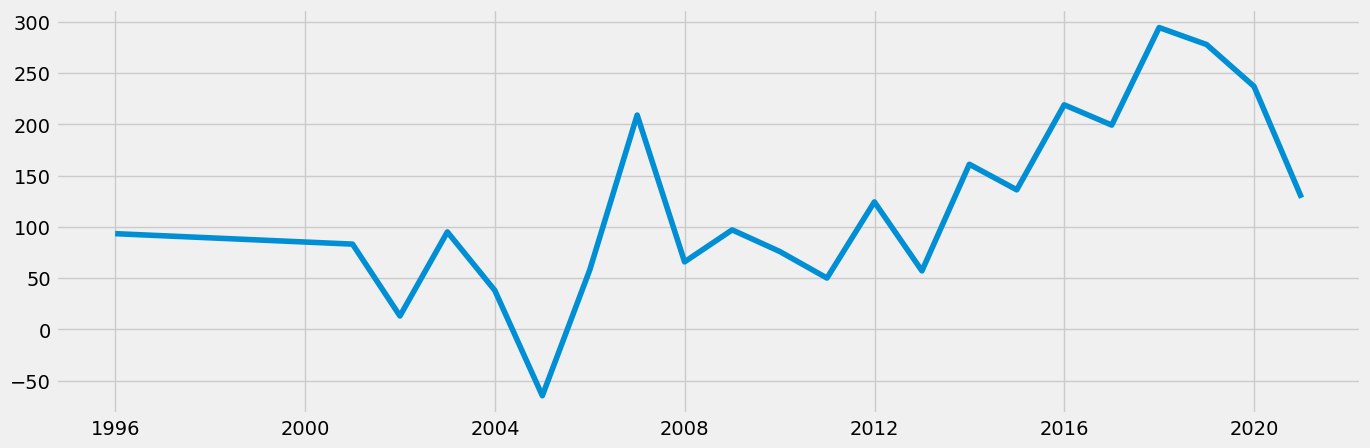

In [65]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [66]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.203172
p-value                         0.019802
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


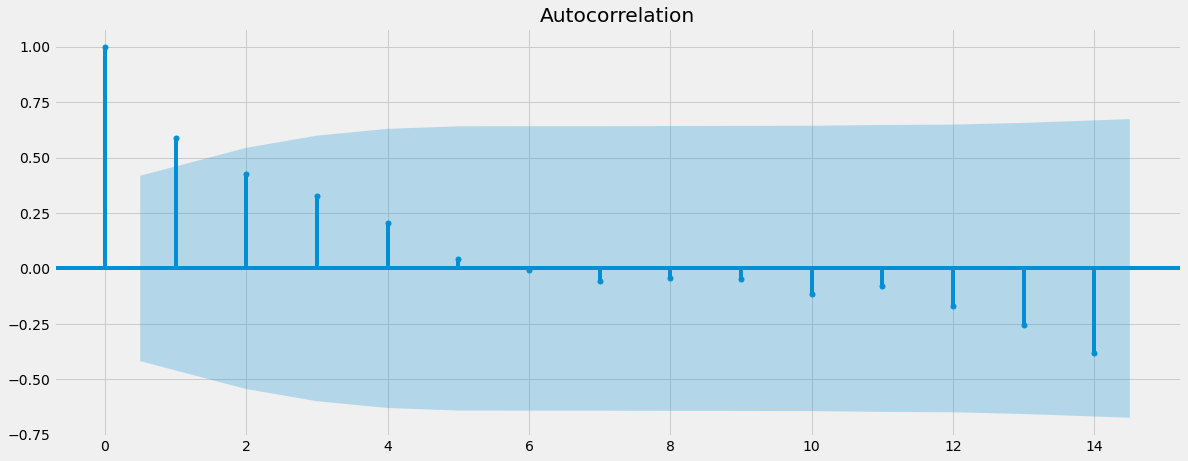

In [67]:
plot_acf(data_diff)
plt.show()